In [475]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [349]:
df=pd.read_csv('C:/Users/kaism/Desktop/csv/diabetes2.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Data preprocessing and visualization

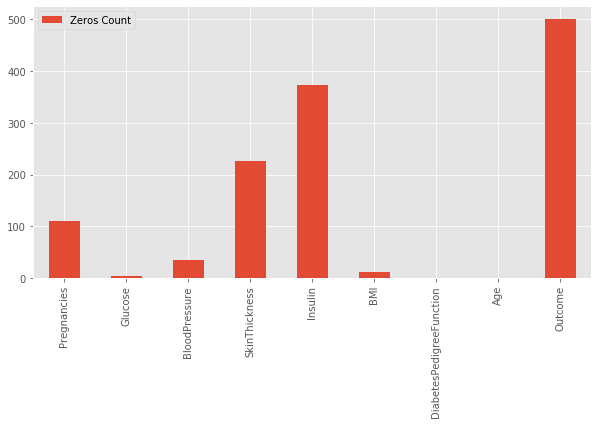

In [350]:
#plot number of zeros for each feature
z=(df == 0).sum(axis=0)
z=pd.DataFrame(z)
z.columns=['Zeros Count']
z.plot(kind='bar',stacked=True, figsize=(10,5),grid=True)

#The zeros of the features: 'Glucose','BloodPressure','SkinThickness','Insulin','BMI' represents missing values

In [351]:
#replace zeros by Nan
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [354]:
#missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

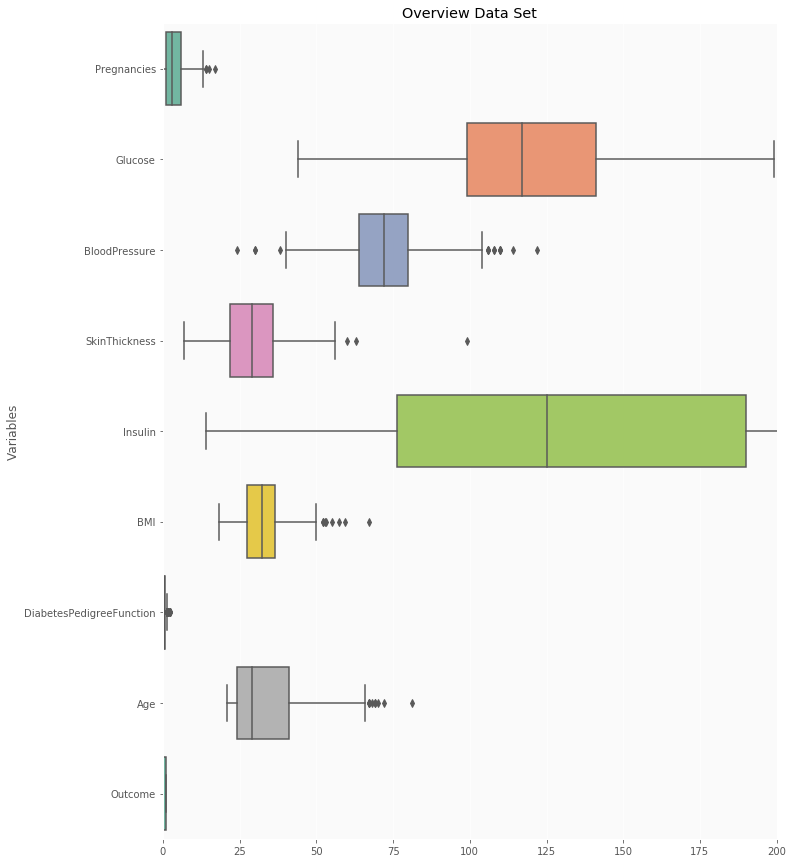

In [355]:
#Find outliers
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [357]:
#function to represent median for each feature depending on outcome:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [358]:
#Replace 'Insulin' missing values and outliers:

In [359]:
median_target('Insulin')

,Outcome,Insulin
0,0,102.5
1,1,169.5


In [360]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()), 'Insulin'] = 169.5

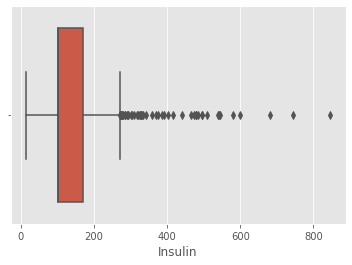

In [361]:
sns.boxplot(df.Insulin)

In [362]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin']>270), 'Insulin'] =102.5
df.loc[(df['Outcome'] == 1 ) & (df['Insulin']>270), 'Insulin'] =169.5

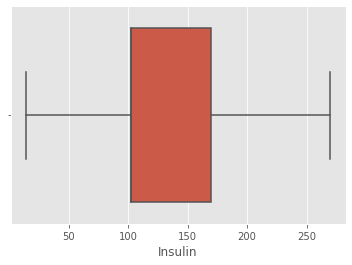

In [363]:
sns.boxplot(df.Insulin)

In [364]:
#Replace 'Glucose' missing values and outliers

In [365]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [366]:
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()), 'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()), 'Glucose'] = 140

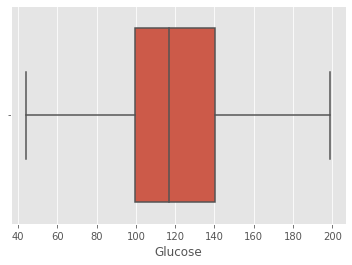

In [367]:
sns.boxplot(df.Glucose)

In [368]:
#Replace 'SkinThickness' missing values and outliers

In [369]:
median_target('SkinThickness')

,Outcome,SkinThickness
0,0,27.0
1,1,32.0


In [370]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32

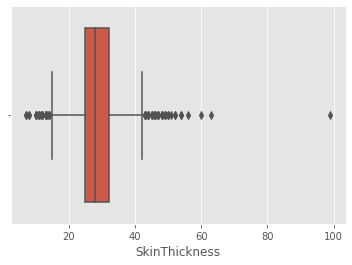

In [371]:
sns.boxplot(df.SkinThickness)

In [372]:
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness']>38), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness']>38), 'SkinThickness'] = 32
df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness']<20), 'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness']<20), 'SkinThickness'] = 32

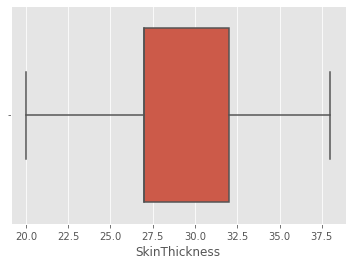

In [373]:
sns.boxplot(df.SkinThickness)

In [374]:
#Replace 'BloodPressure' missing values and outliers

In [375]:
median_target('BloodPressure')

,Outcome,BloodPressure
0,0,70.0
1,1,74.5


In [376]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5

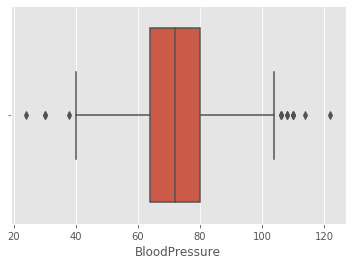

In [377]:
sns.boxplot(df.BloodPressure)

In [378]:
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure']<41), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure']<41), 'BloodPressure'] = 74.5
df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure']>99), 'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure']>99), 'BloodPressure'] = 74.5

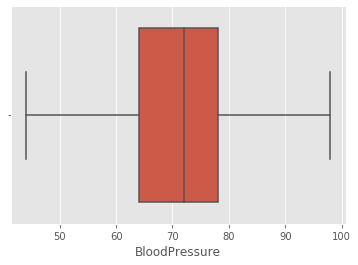

In [379]:
sns.boxplot(df.BloodPressure)

In [380]:
#Replace 'BMI' missing values and outliers

In [381]:
median_target('BMI')

,Outcome,BMI
0,0,30.1
1,1,34.3


In [382]:

df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()), 'BMI'] = 34.3

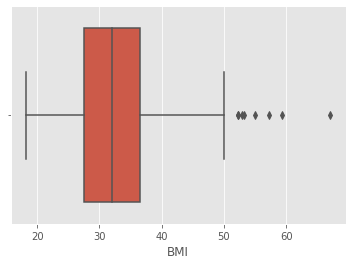

In [383]:
sns.boxplot(df.BMI)

In [384]:
df.loc[(df['Outcome'] == 0 ) & (df['BMI']>49), 'BMI'] = 30.1
df.loc[(df['Outcome'] == 1 ) & (df['BMI']>49), 'BMI'] = 34.3

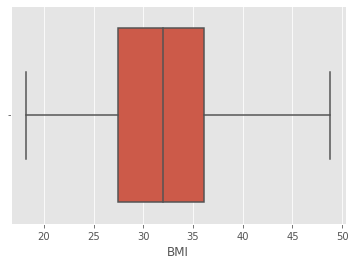

In [385]:
sns.boxplot(df.BMI)

In [386]:
#Replace 'DiabetesPedigreeFunction' missing values and outliers:

In [387]:
median_target('DiabetesPedigreeFunction')

,Outcome,DiabetesPedigreeFunction
0,0,0.336
1,1,0.449


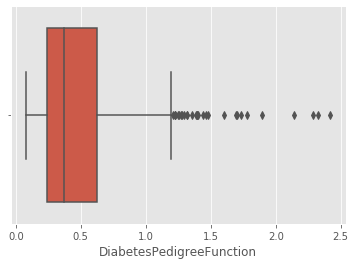

In [388]:
sns.boxplot(df.DiabetesPedigreeFunction)

In [389]:
df.loc[(df['Outcome'] == 0 ) & (df['DiabetesPedigreeFunction']>1), 'DiabetesPedigreeFunction'] = 0.336
df.loc[(df['Outcome'] == 1 ) & (df['DiabetesPedigreeFunction']>1), 'DiabetesPedigreeFunction'] = 0.449

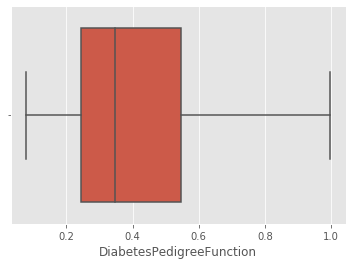

In [390]:
sns.boxplot(df.DiabetesPedigreeFunction)

In [391]:
# Replace 'Age' missing values and outliers

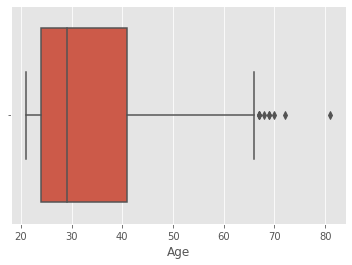

In [392]:
sns.boxplot(df.Age)

In [393]:
median_target('Age')

,Outcome,Age
0,0,27
1,1,36


In [394]:
df.loc[(df['Outcome'] == 0 ) & (df['Age']>61), 'Age'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['Age']>61), 'Age'] = 36

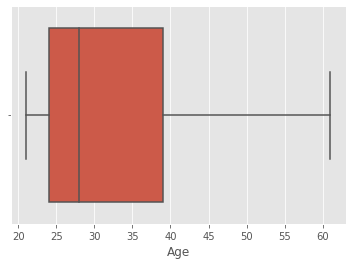

In [395]:
sns.boxplot(df.Age)

In [396]:
#Replace 'Pregnancies' missing values and outliers

In [397]:
median_target('Pregnancies')

,Outcome,Pregnancies
0,0,2
1,1,4


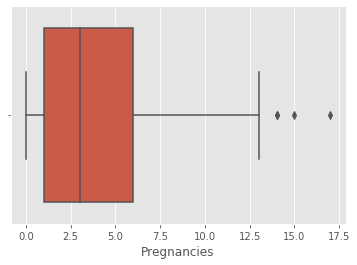

In [398]:
sns.boxplot(df.Pregnancies)

In [399]:
df.loc[(df['Outcome'] == 0 ) & (df['Pregnancies']>13), 'Pregnancies'] = 2
df.loc[(df['Outcome'] == 1 ) & (df['Pregnancies']>13), 'Pregnancies'] = 4

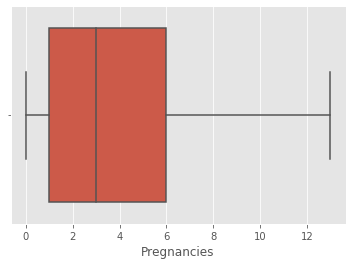

In [400]:
sns.boxplot(df.Pregnancies)

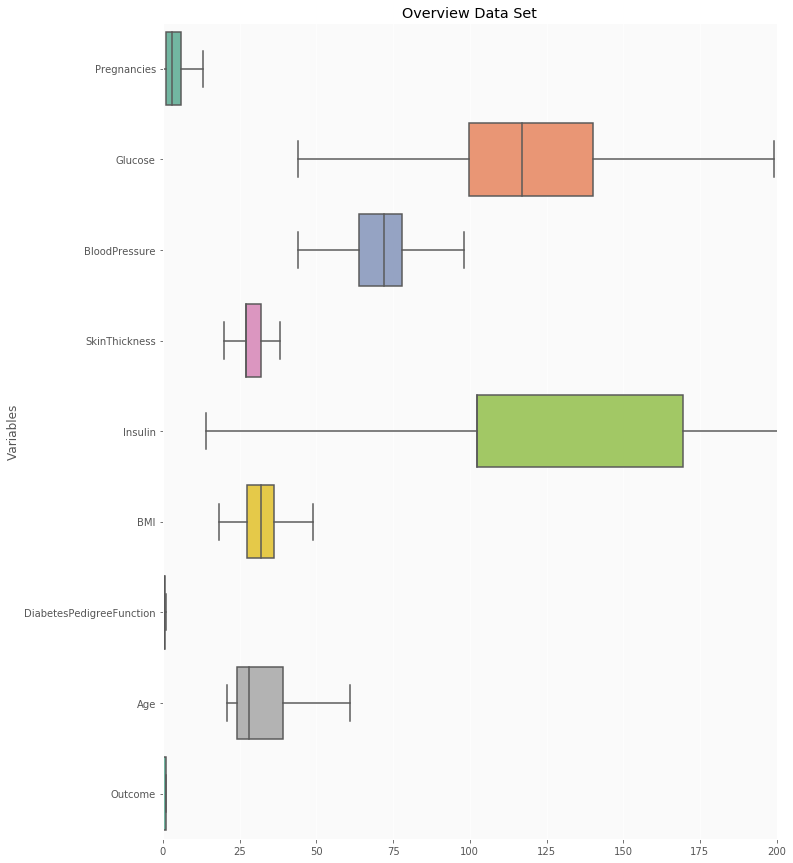

In [401]:
#Plot to verifie that there is no outliers:
plt.style.use('ggplot') # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')
ax.set(xlim=(-.05, 200))
plt.ylabel('Variables')
plt.title("Overview Data Set")
ax = sns.boxplot(data = df, 
  orient = 'h', 
  palette = 'Set2')

In [402]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Some other plots

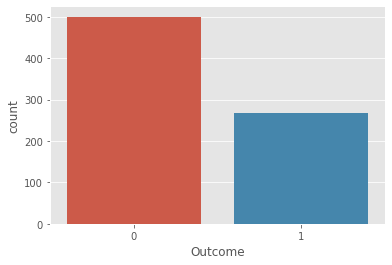

In [470]:
sns.countplot(x='Outcome',data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C70F465588>,
      dtype=object)

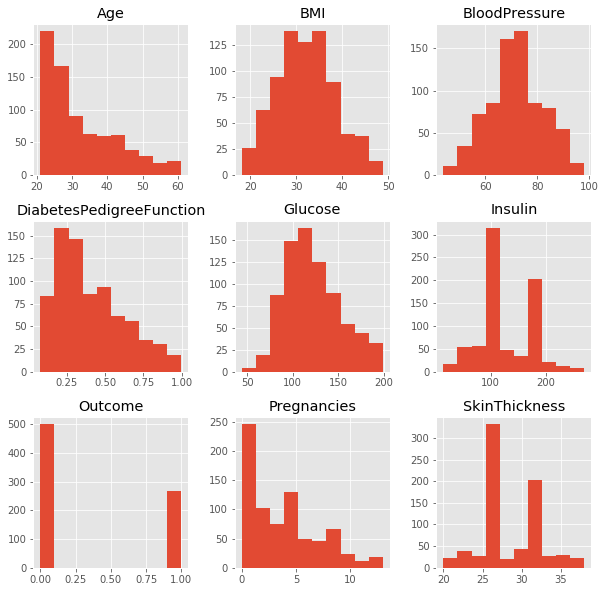

In [403]:
df.hist(figsize=(10,10))

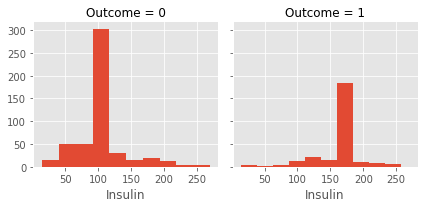

In [449]:
g=sns.FacetGrid(df,col='Outcome')
g.map(plt.hist,'Insulin',bins=10)

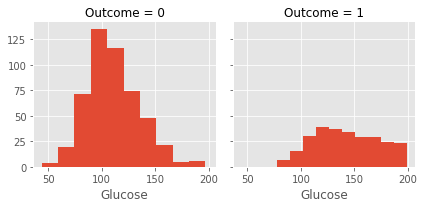

In [450]:
g=sns.FacetGrid(df,col='Outcome')
g.map(plt.hist,'Glucose',bins=10)

# Logistic Regression

In [404]:
x=df.drop(["Outcome"],axis=1)
y=df["Outcome"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
logreg=LogisticRegression(max_iter=1000)
logreg.fit(x_train,y_train)
y_predict=logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test,y_test)))

Accuracy=0.92


<Figure size 432x288 with 0 Axes>

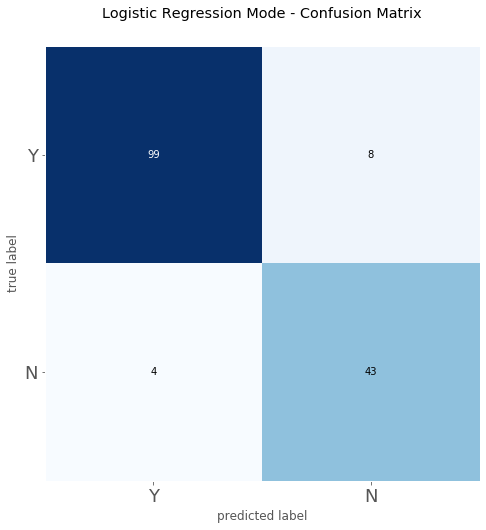

In [405]:
#Confusion matrix
cm = confusion_matrix(y_test,y_predict)
plt.figure()
plot_confusion_matrix(cm, figsize = (12, 8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("Logistic Regression Mode - Confusion Matrix")
plt.xticks(range(2), ["Y", "N"], fontsize = 18)
plt.yticks(range(2), ["Y", "N"], fontsize = 18)
plt.show()

In [406]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       107
           1       0.84      0.91      0.88        47

    accuracy                           0.92       154
   macro avg       0.90      0.92      0.91       154
weighted avg       0.93      0.92      0.92       154



# KNN

In [407]:
std = StandardScaler()
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Accuracy=',accuracy_score(y_pred,y_test))

Accuracy= 0.922077922077922


In [408]:
knn1=KNeighborsClassifier(n_neighbors=20)
knn1.fit(x_train,y_train)
y_pred1=knn1.predict(x_test)
print('Accuracy=',accuracy_score(y_pred1,y_test))

Accuracy= 0.935064935064935


<Figure size 432x288 with 0 Axes>

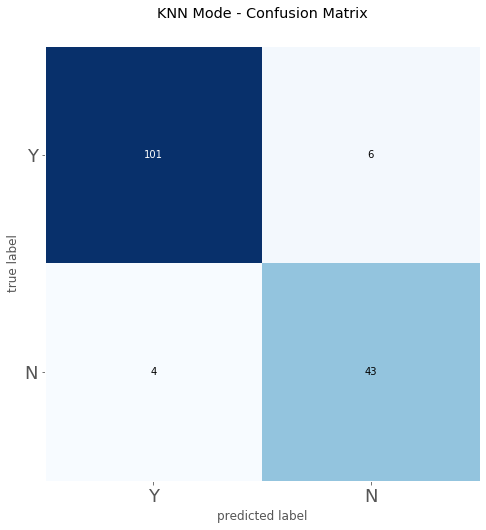

In [409]:
#Confusion matrix
cm = confusion_matrix(y_test,y_pred1)
plt.figure()
plot_confusion_matrix(cm, figsize = (12, 8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("KNN Mode - Confusion Matrix")
plt.xticks(range(2), ["Y", "N"], fontsize = 18)
plt.yticks(range(2), ["Y", "N"], fontsize = 18)
plt.show()

In [410]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       107
           1       0.88      0.91      0.90        47

    accuracy                           0.94       154
   macro avg       0.92      0.93      0.92       154
weighted avg       0.94      0.94      0.94       154



# Decision tree

In [441]:
dtree=tree.DecisionTreeClassifier(criterion="gini",splitter='best',max_leaf_nodes=5,min_samples_leaf=1,max_depth=100)
dtree.fit(x_train,y_train)
y_pred2=dtree.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred2))

Accuracy 0.922077922077922


In [442]:
dtree1=tree.DecisionTreeClassifier(criterion="gini",splitter='best',max_leaf_nodes=10,min_samples_leaf=1,max_depth=200)
dtree1.fit(x_train,y_train)
y_pred3=dtree1.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred3))

Accuracy 0.9285714285714286


<Figure size 432x288 with 0 Axes>

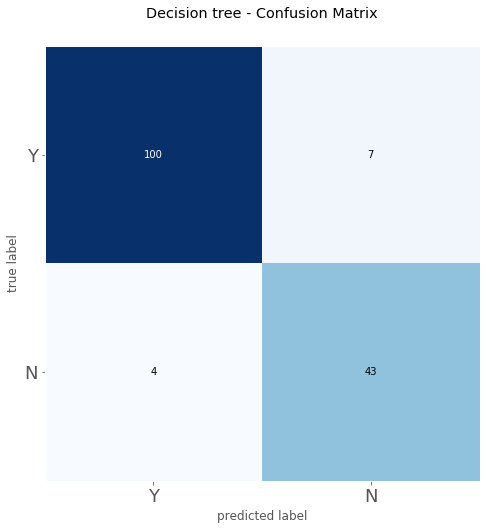

In [443]:
#Confusion matrix
cm = confusion_matrix(y_test,y_pred3)
plt.figure()
plot_confusion_matrix(cm, figsize = (12, 8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("Decision tree - Confusion Matrix")
plt.xticks(range(2), ["Y", "N"], fontsize = 18)
plt.yticks(range(2), ["Y", "N"], fontsize = 18)
plt.show()

In [444]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       107
           1       0.86      0.91      0.89        47

    accuracy                           0.93       154
   macro avg       0.91      0.92      0.92       154
weighted avg       0.93      0.93      0.93       154



# Random Forest

In [445]:
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train,y_train)
y_pred4=clf.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred4))

Accuracy 0.935064935064935


In [446]:
clf1=RandomForestClassifier(n_estimators=20)
clf1.fit(x_train,y_train)
y_pred5=clf1.predict(x_test)
print('Accuracy',accuracy_score(y_test,y_pred5))

Accuracy 0.948051948051948


<Figure size 432x288 with 0 Axes>

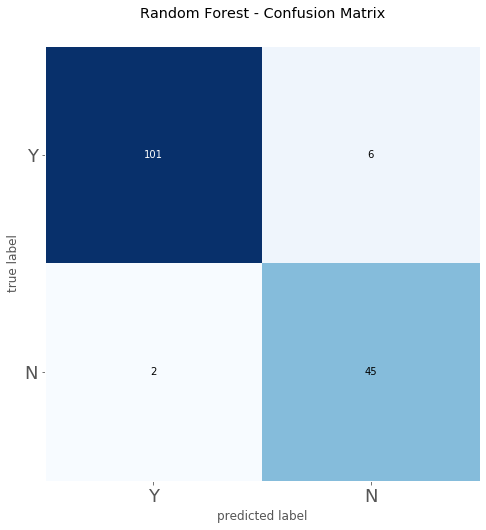

In [447]:
#Confusion matrix
cm = confusion_matrix(y_test,y_pred5)
plt.figure()
plot_confusion_matrix(cm, figsize = (12, 8), hide_ticks = True, cmap = plt.cm.Blues)
plt.title("Random Forest - Confusion Matrix")
plt.xticks(range(2), ["Y", "N"], fontsize = 18)
plt.yticks(range(2), ["Y", "N"], fontsize = 18)
plt.show()

In [448]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       107
           1       0.88      0.96      0.92        47

    accuracy                           0.95       154
   macro avg       0.93      0.95      0.94       154
weighted avg       0.95      0.95      0.95       154



# Conclusion: All the models used here achieved well but Random Forest and KNN have realised the best results.  Besides, replacing zeros and outliers of the dataset increased the accuracy by more than 10%.